In [1]:
import numpy as np
import pandas as pd
import pyflux as pf
import scipy
from datetime import datetime
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

# get data

In [2]:
import os
curr_directory = os.getcwd()
datafile = curr_directory + "/data/Food_price_indices_data_jul.csv"
food_data = pd.read_csv(datafile)
food_data.head()

,Date,Food Price Index,Meat Price Index,Dairy Price Index,Cereals Price Index,Oils Price Index,Sugar Price Index
0,1/1990,108.7,112.3,94.3,106.4,73.0,201.5
1,2/1990,109.9,117.7,91.9,104.0,72.5,207.9
2,3/1990,107.9,119.6,73.6,102.1,74.6,218.0
3,4/1990,114.2,131.0,85.2,105.1,71.8,216.3
4,5/1990,111.2,130.5,70.0,105.3,74.4,207.2


In [3]:
datafile2 = curr_directory + "/data/GLB.Ts+dSST.csv"
temperature_data = pd.read_csv(datafile2)
temperature_data.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
0,1880,-0.29,-0.18,-0.11,-0.19,-0.11,-0.23,-0.20,-0.09,-0.15,-0.23,-0.2,-0.22,-0.18,***,***,-0.14,-0.17,-0.19
1,1881,-0.15,-0.17,0.04,0.04,0.02,-0.20,-0.06,-0.02,-0.13,-0.2,-0.21,-0.1,-0.09,-0.1,-0.18,0.04,-0.09,-0.18
2,1882,0.15,0.15,0.04,-0.18,-0.16,-0.25,-0.20,-0.05,-0.09,-0.24,-0.16,-0.24,-0.1,-0.09,0.07,-0.10,-0.17,-0.16
3,1883,-0.31,-0.38,-0.12,-0.17,-0.20,-0.12,-0.08,-0.15,-0.2,-0.14,-0.22,-0.15,-0.19,-0.19,-0.31,-0.16,-0.11,-0.19
4,1884,-0.15,-0.08,-0.37,-0.42,-0.36,-0.40,-0.34,-0.26,-0.27,-0.24,-0.29,-0.27,-0.29,-0.28,-0.13,-0.38,-0.33,-0.27


# clean the data

In [4]:
from Capstone.cleaning import cleaning

clean_temp_data = cleaning.clean_temperature_data_step1(temperature_data)
clean_temp_data = cleaning.clean_temperature_data_step2(clean_temp_data)

In [5]:
clean_temp_data.dtypes

Date           datetime64[ns]
Temperature           float64
dtype: object

In [6]:
clean_food_data = cleaning.clean_food_data(food_data)

In [7]:
clean_food_data['Temperature'] = clean_temp_data['Temperature']

In [8]:
clean_food_data.tail()

,Date,Meat Price Index,Dairy Price Index,Cereals Price Index,Oils Price Index,Sugar Price Index,Temperature
337,2018-02-01,170.3,191.1,161.3,158.0,192.4,0.81
338,2018-03-01,171.0,197.4,165.4,156.8,185.5,0.91
339,2018-04-01,170.4,204.1,168.5,154.6,176.1,0.87
340,2018-05-01,169.3,215.2,172.6,150.6,175.3,0.82
341,2018-06-01,169.8,213.2,166.2,146.1,177.4,0.76


In [9]:
# export cleaned and combined data to csv file
#clean_food_data.to_csv('clean_food_data.csv')

In [10]:
indexed_df = clean_food_data.set_index(['Date'])

# Data exploration and visualization
don't forget that the data is on a scale of 2002-2004 = 100.0

In [ ]:
indexed_df.describe()

In [ ]:
indexed_df.head()

In [ ]:
import seaborn as sns

f, ax = plt.subplots(figsize=(10, 8))
corr = indexed_df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool),
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)


In [ ]:
pd.plotting.scatter_matrix(indexed_df, alpha = 0.3, figsize = (14,14), diagonal = 'kde');

In [ ]:
# checking for collinearity
food_corr = np.corrcoef(indexed_df, rowvar=False)
eig_val, eig_vec = np.linalg.eig(food_corr)
eig_val

In [ ]:
indexed_df.plot()
plt.show()

In [ ]:
indexed_df.hist(figsize=(8,8))
plt.show()

# feature engineering

In [ ]:
df_diff = indexed_df.diff()

In [ ]:
df_diff.head()

In [ ]:
df_diff.plot()
plt.show()

In [ ]:
pd.plotting.scatter_matrix(df_diff, alpha = 0.3, figsize = (14,14), diagonal = 'kde');

In [ ]:
from statsmodels.tsa.stattools import adfuller


def test_fuller(df):
    result = adfuller(df[1:])
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

In [ ]:
test_fuller(df_diff['Meat Price Index'])

In [ ]:
test_fuller(df_diff['Cereals Price Index'])

In [ ]:
test_fuller(df_diff['Dairy Price Index'])

In [ ]:
test_fuller(df_diff['Oils Price Index'])

In [ ]:
test_fuller(df_diff['Sugar Price Index'])

all adfuller tests show that the differenced data is stationary



In [ ]:
#food_data['Year'], food_data['Month'] = food_data['Date'].dt.year, food_data['Date'].dt.month

#food_data['Season_NH'] = food_data['Date'].apply(lambda dt: (dt.month%12 + 3)//3)

In [ ]:
food_data.head()

In [ ]:
clean_food_data.head()

In [11]:
tsfresh_data = pd.melt(clean_food_data, id_vars='Date')

In [ ]:
# trying something
# tsfresh_data2 = pd.melt(indexed_df)
# didn't work. need a date column for the tsfresh stuff


In [12]:
tsfresh_data.head()

,Date,variable,value
0,1990-01-01,Meat Price Index,112.3
1,1990-02-01,Meat Price Index,117.7
2,1990-03-01,Meat Price Index,119.6
3,1990-04-01,Meat Price Index,131.0
4,1990-05-01,Meat Price Index,130.5


In [13]:
from tsfresh import extract_features
extracted_features = extract_features(tsfresh_data, column_id='variable', column_sort='Date')

Feature Extraction: 100%|██████████| 6/6 [00:01<00:00,  3.42it/s]


In [14]:
extracted_features.shape

(6, 794)

In [ ]:
extracted_features.head()

In [15]:
from skits.preprocessing import DifferenceTransformer
from skits.pipeline import ForecasterPipeline
from skits.feature_extraction import (AutoregressiveTransformer,
                                      SeasonalTransformer)

ModuleNotFoundError: No module named 'skits'

In [ ]:
from skits.preprocessing import (ReversibleImputer, 
                                 DifferenceTransformer)
from skits.pipeline import ForecasterPipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
meat_y = clean_food_data['Meat Price Index'].copy()
meat_X = meat_y.copy()[:, np.newaxis]


In [ ]:
pipeline = ForecasterPipeline([
    ('pre_differencer', DifferenceTransformer(period=1)),
    ('pre_diff_imputer', ReversibleImputer()),
    ('pre_yr_differencer', DifferenceTransformer(period=12)),
    ('pre_yr_diff_imputer', ReversibleImputer()),
    ('pre_scaler', StandardScaler()),
    ('features', FeatureUnion([
        ('ar_features', AutoregressiveTransformer(num_lags=1)),
        ('seasonal_features', SeasonalTransformer(seasonal_period=12)),
    ])),
    ('post_feature_imputer', ReversibleImputer()),
    ('post_feature_scaler', StandardScaler()),
    ('regressor', LinearRegression(fit_intercept=False))
])

pipeline = pipeline.fit(X, y)

In [ ]:
from tsfresh import extract_relevant_features
extracted_features = extract_relevant_features(tsfresh_data2, tsfresh_data2, column_id='variable')


In [24]:
# training set up to 2016
train = indexed_df.loc['1990':'2016']
test = indexed_df.loc['2017':'2018']

# Unsupervised learning

In [26]:
# trying pca woo
test_pca = PCA(n_components=3)
test_pca.fit(extracted_features)
test_pca.transform(extracted_features)

array([[-1.04221151e+05, -4.62528596e+05, -6.83804901e+03],
       [ 8.74211990e+05, -3.59700070e+05,  6.66161243e+04],
       [-1.66215922e+06, -8.38462307e+05, -3.31131400e+04],
       [-2.87006236e+05, -4.11288812e+05, -1.33943017e+04],
       [ 1.09092426e+07,  9.16457584e+05, -1.19653711e+04],
       [-9.73006800e+06,  1.15552220e+06, -1.30526249e+03]])

In [ ]:
# do some kind of unsupervised learning here

In [ ]:
# using tsfresh for feature generation, then PCA for unsupervised learning req

# Supervised Learning

In [ ]:
split_point = len(df_diff) - 70
diff_dataset, diff_validation = df_diff[1:split_point], df_diff[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
#dataset.to_csv('dataset.csv')
#validation.to_csv('validation.csv')

In [ ]:
# try VAR from Pyflux
indexed_prices = np.log(indexed_df)
plt.figure(figsize=(15,5));
plt.plot(indexed_prices.index,indexed_prices);
#plt.legend(opening_prices.columns.values,loc=3);
plt.title("Logged Index price");

In [16]:
def VAR_model(df, lags, differences, h, past_values):
    VAR_model = pf.VAR(data=df, lags=lags, integ=differences)
    VARx = VAR_model.fit()
    print(VARx.summary())
    VAR_model.plot_z(list(range(0,6)),figsize=(15,5))
    VAR_model.plot_fit(figsize=(15,5))
    VAR_model.plot_predict(past_values=past_values, h=h, figsize=(15,5))
    VAR_model.plot_predict_is(h=h, figsize=((15,5)))

VAR(2)                                                                                                    
======================================================= ==================================================
Dependent Variable: Differenced Meat Price Index,Differ Method: OLS                                       
Start Date: 1990-03-01 00:00:00                         Log Likelihood: -5236.0801                        
End Date: 2018-06-01 00:00:00                           AIC: 10670.1603                                   
Number of observations: 339                             BIC: 11048.9343                                   
Latent Variable                          Estimate   Std Error  z        P>|z|    95% C.I.                 
======================================== ========== ========== ======== ======== =========================
Differenced Meat Price Index Constant    0.0586     0.1825     0.3213   0.748    (-0.299 | 0.4162)        
Differenced Meat Price Index AR(1)   

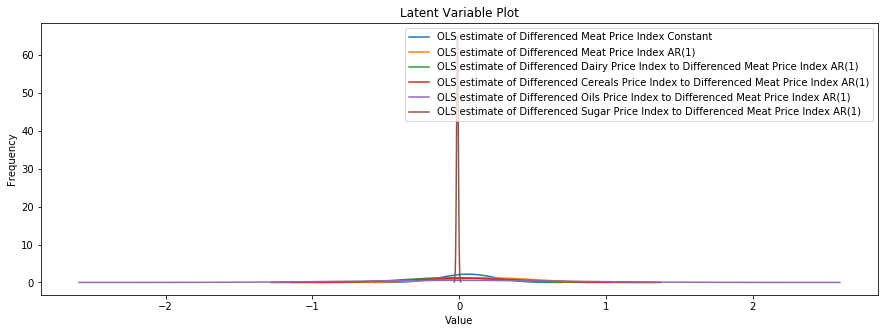

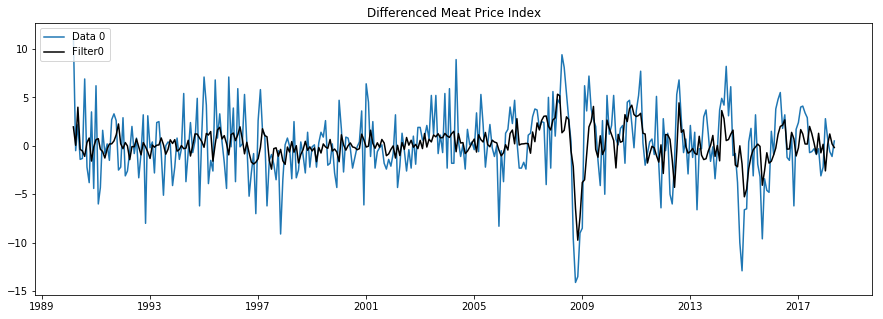

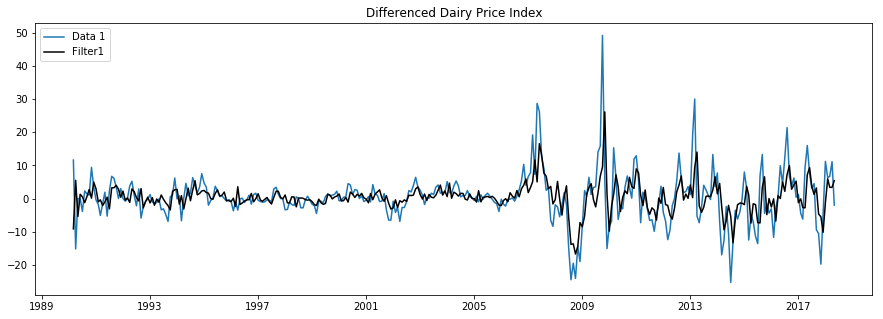

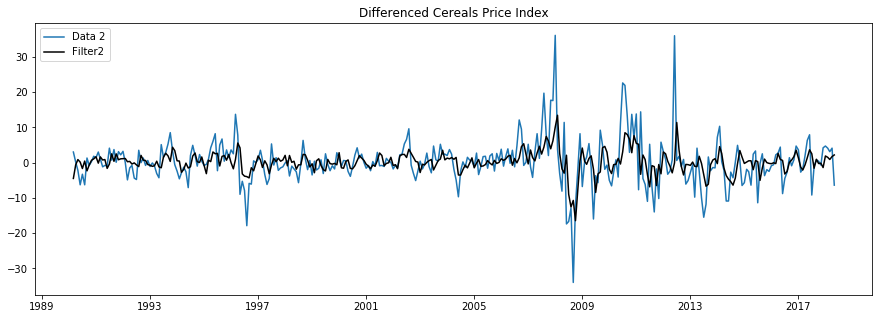

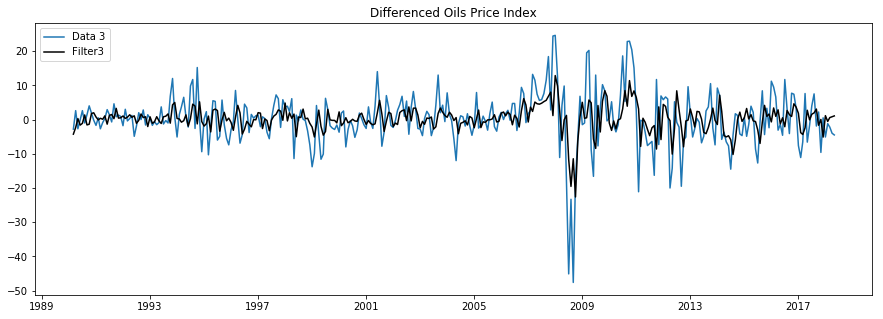

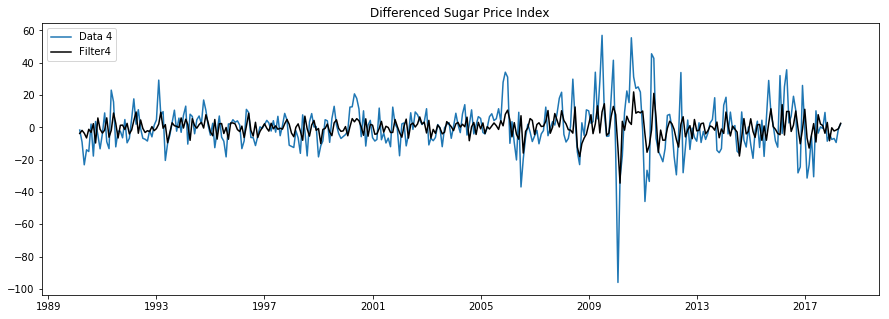

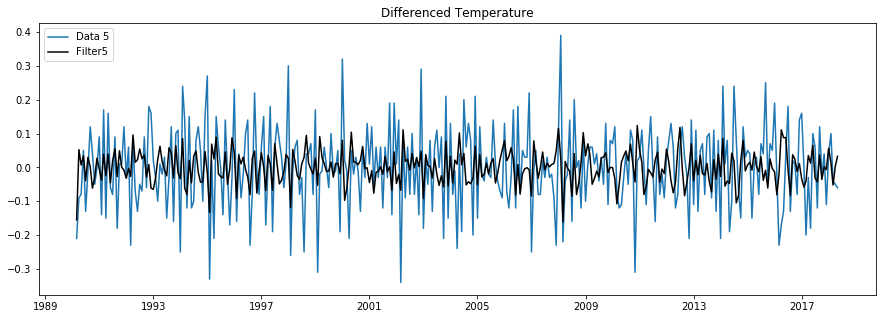

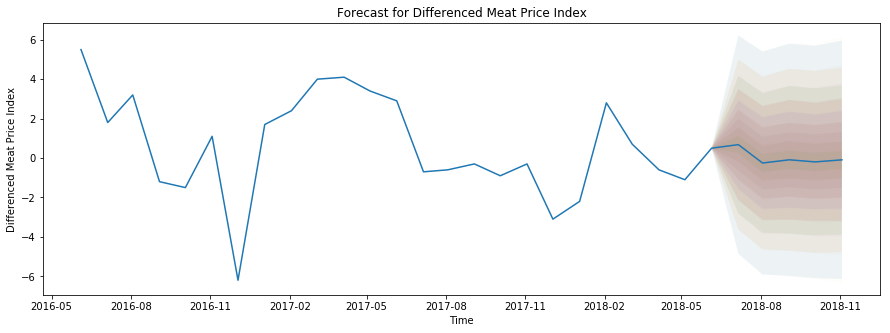

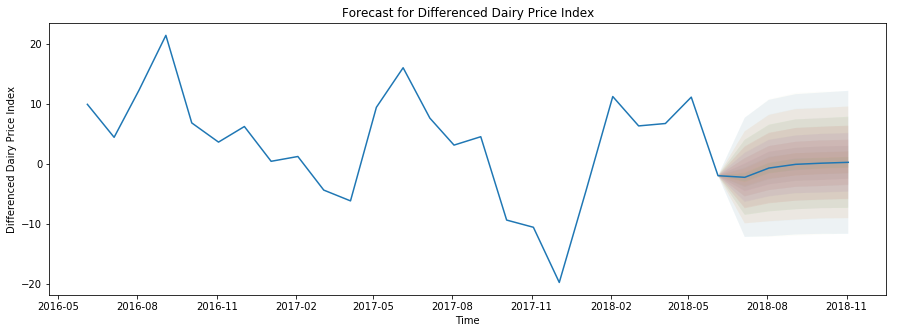

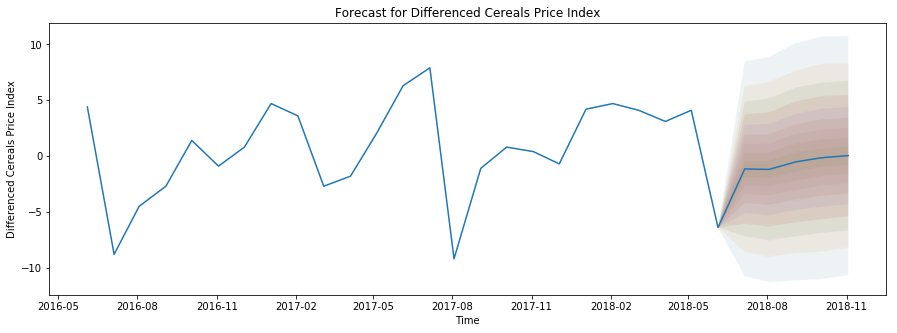

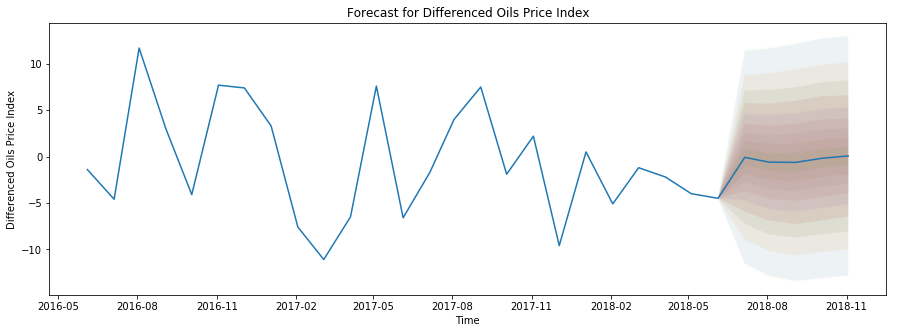

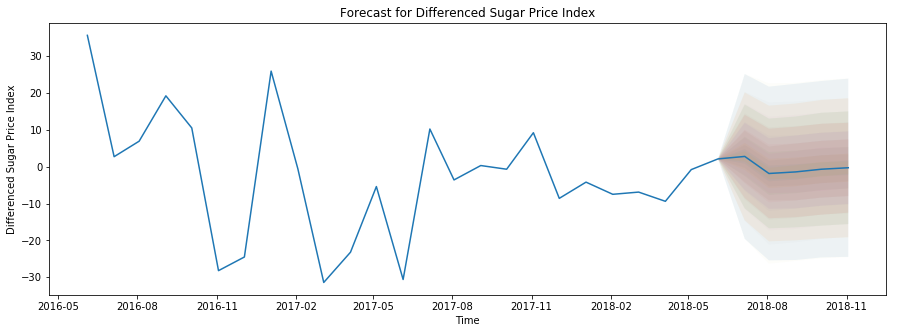

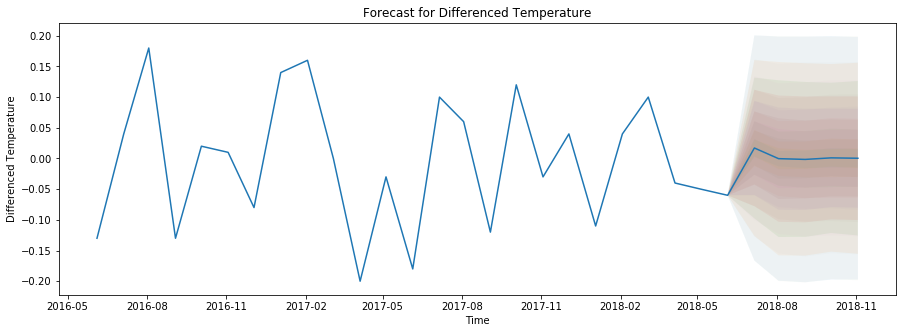

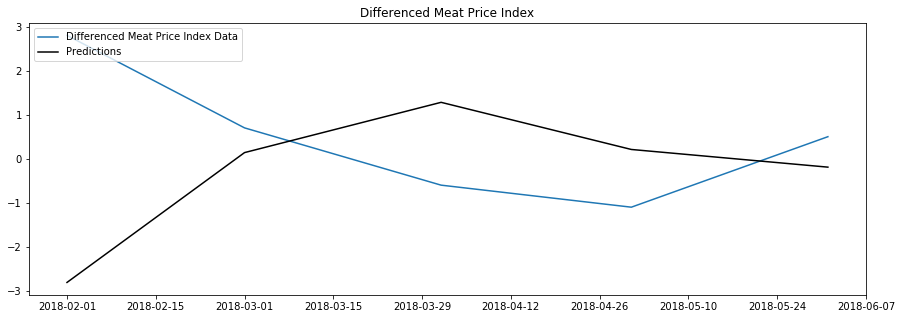

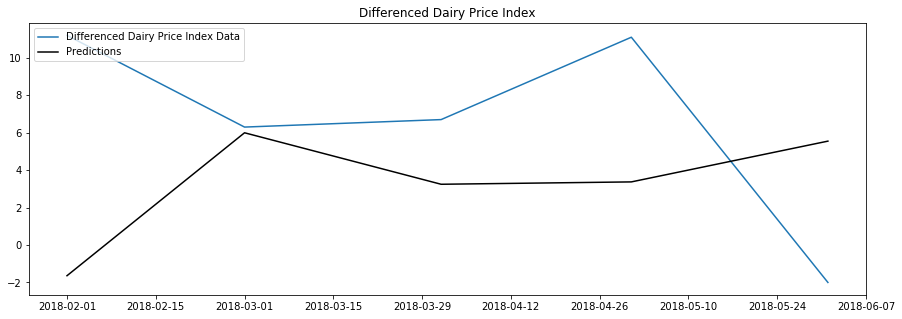

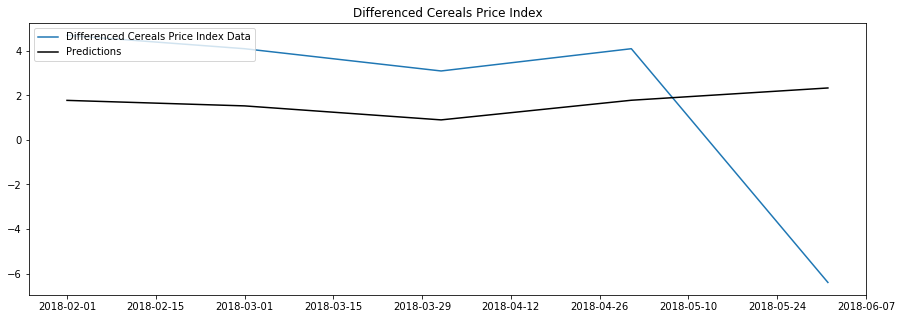

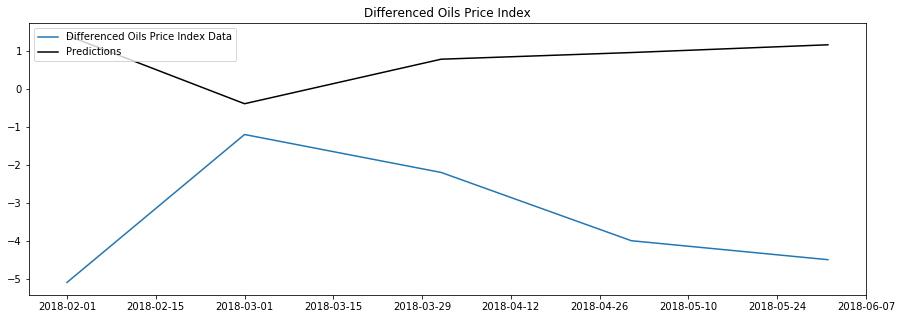

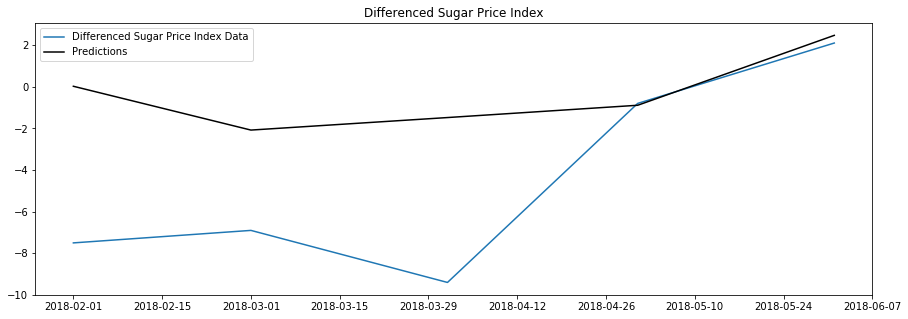

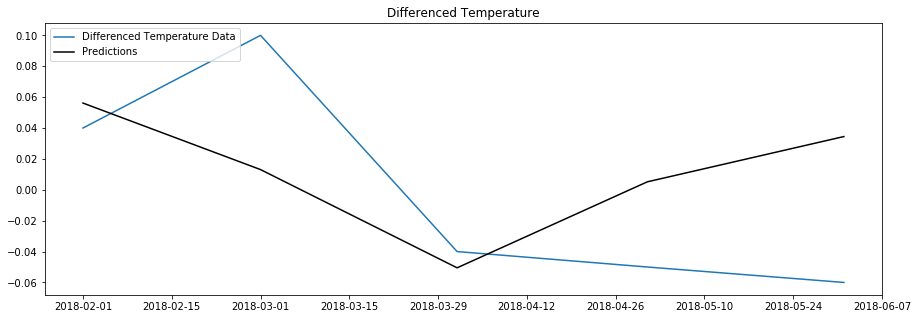

In [17]:
VAR_model(indexed_df, 2, 1, 5, 25)

VAR(1)                                                                                                    
======================================================= ==================================================
Dependent Variable: Differenced Meat Price Index,Differ Method: OLS                                       
Start Date: 1990-02-01 00:00:00                         Log Likelihood: -5294.4344                        
End Date: 2018-06-01 00:00:00                           AIC: 10714.8688                                   
Number of observations: 340                             BIC: 10956.0923                                   
Latent Variable                          Estimate   Std Error  z        P>|z|    95% C.I.                 
======================================== ========== ========== ======== ======== =========================
Differenced Meat Price Index Constant    0.0887     0.192      0.462    0.6441   (-0.2877 | 0.4651)       
Differenced Meat Price Index AR(1)   

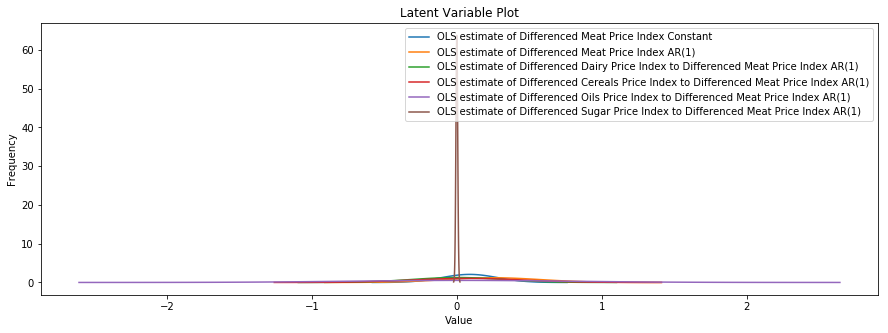

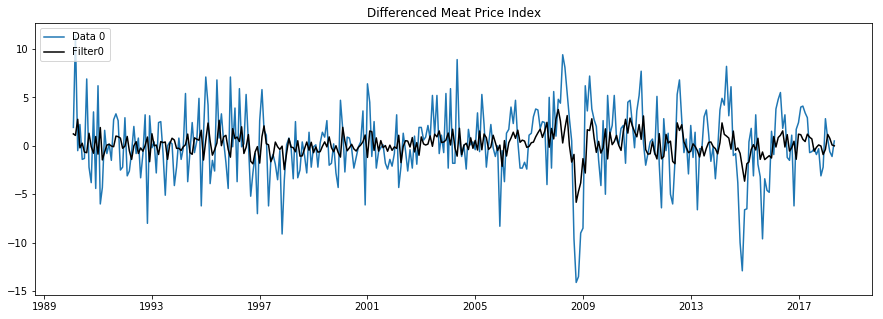

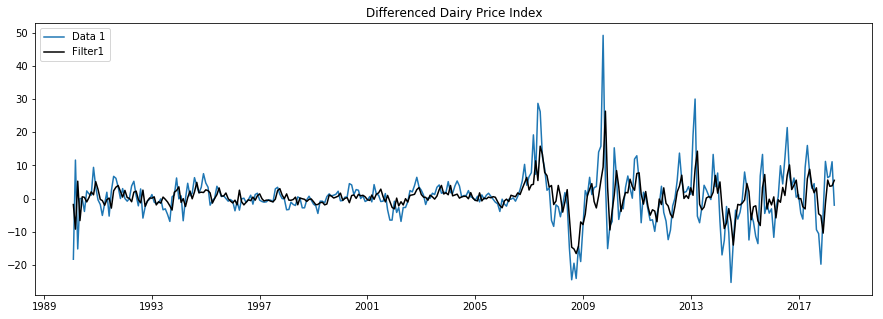

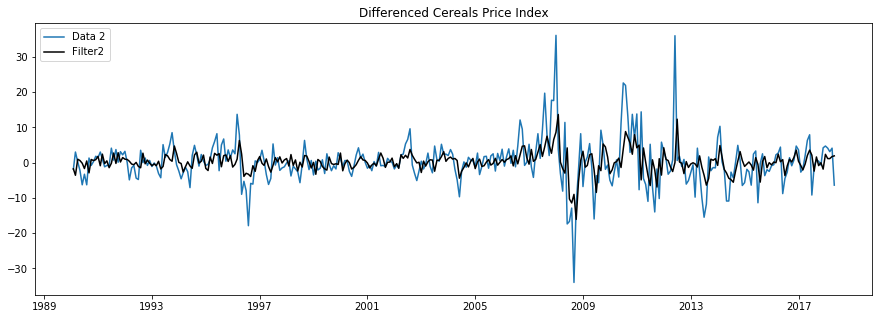

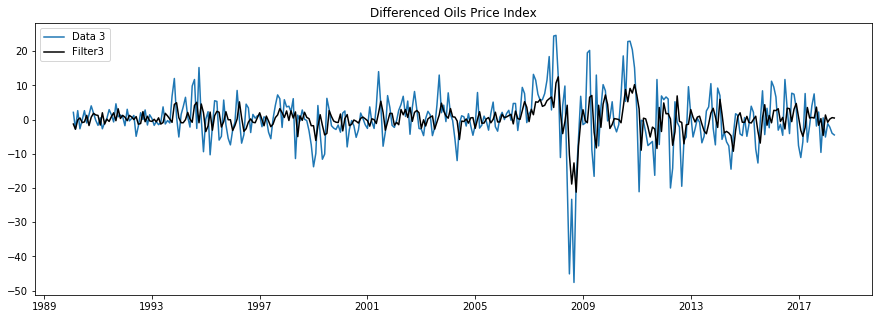

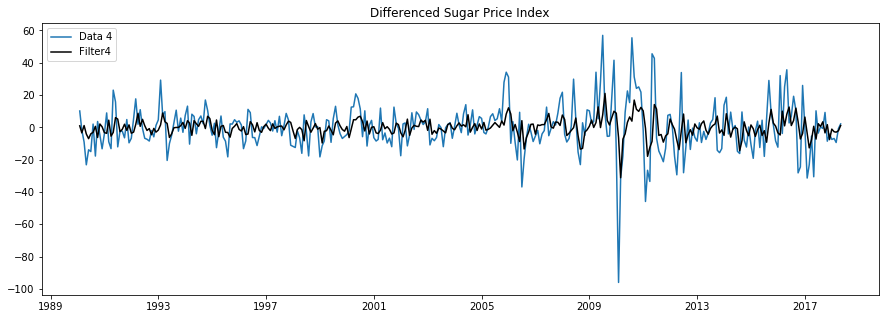

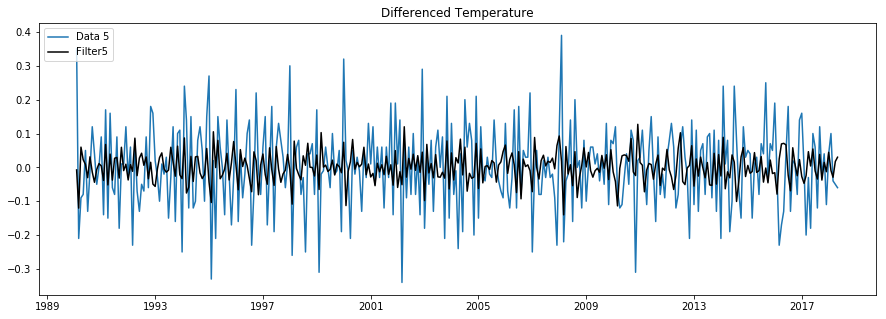

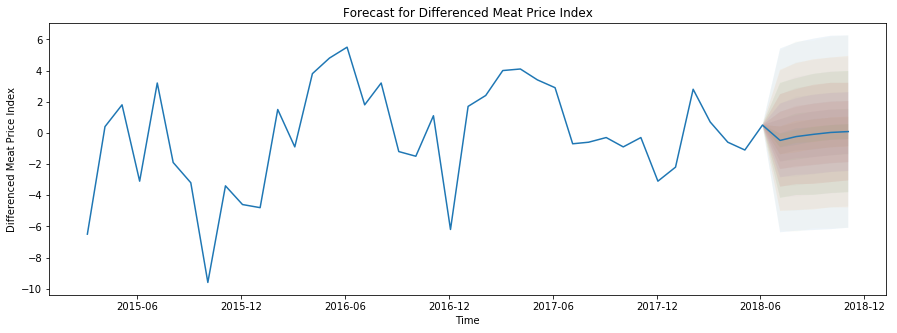

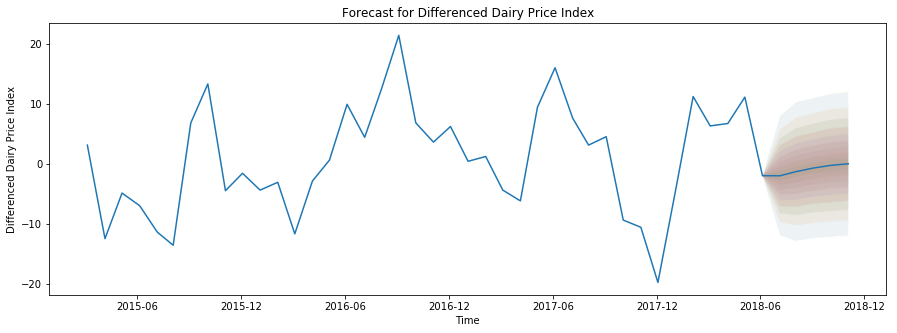

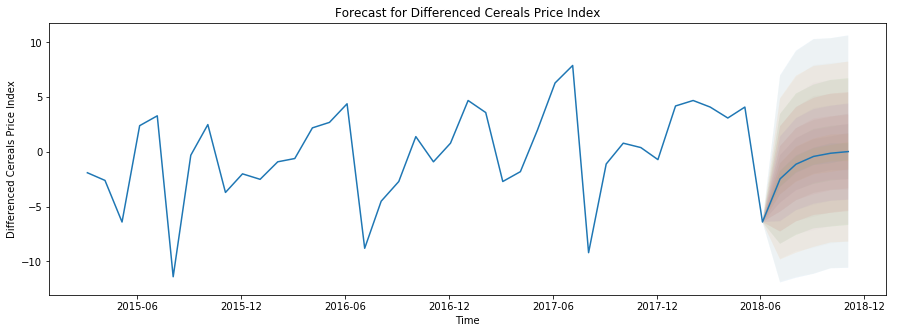

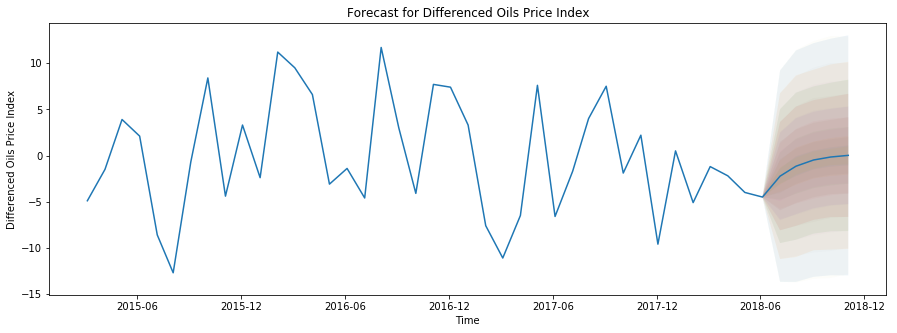

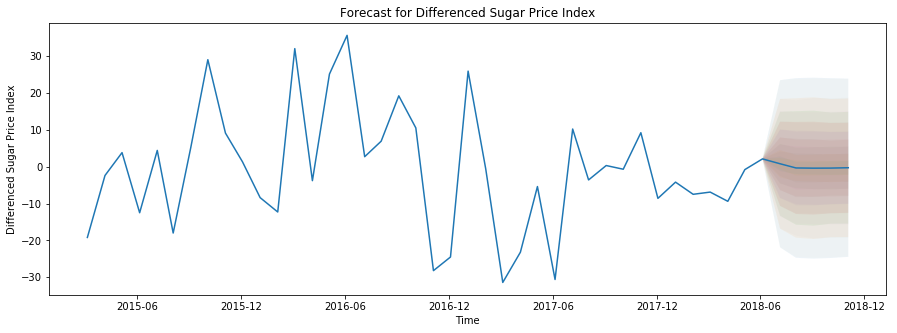

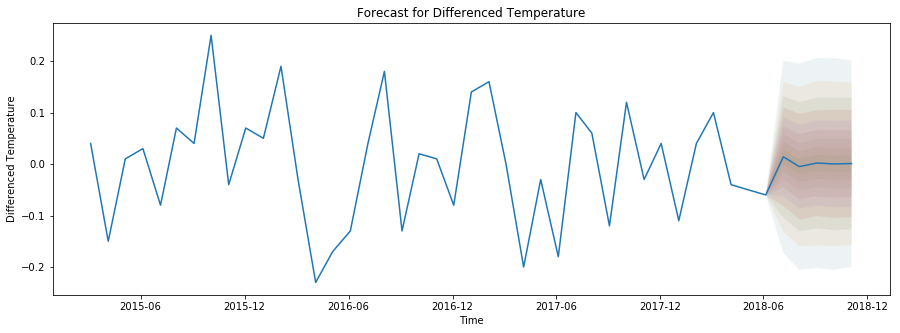

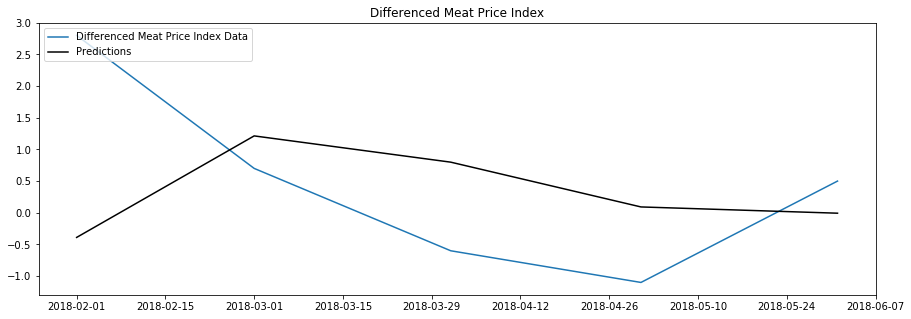

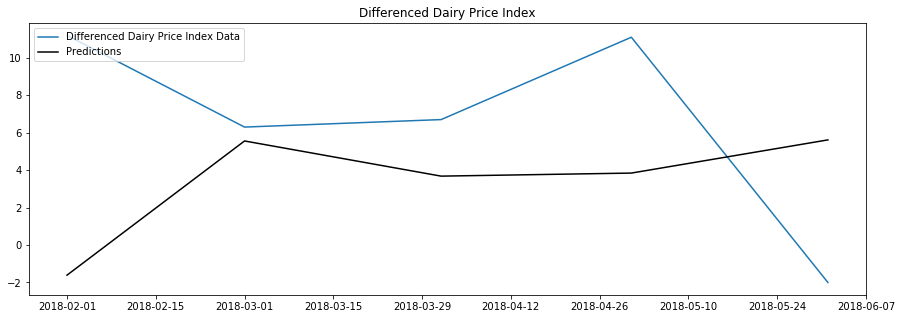

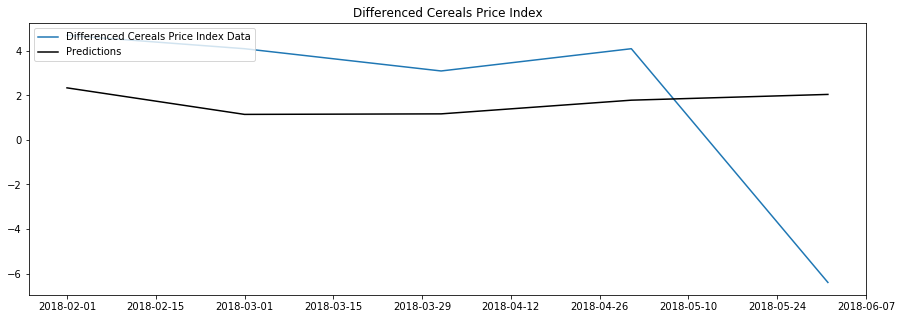

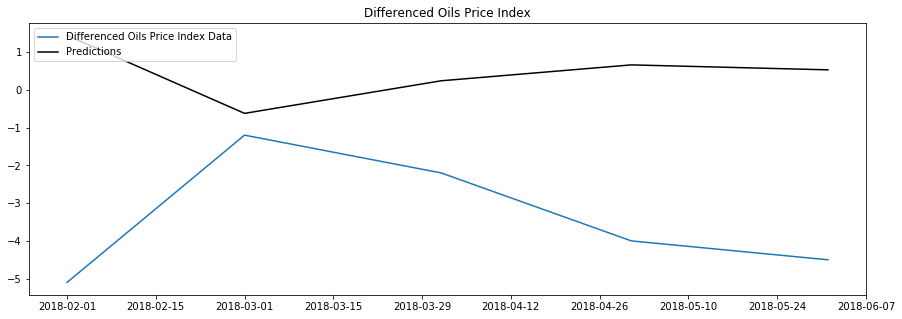

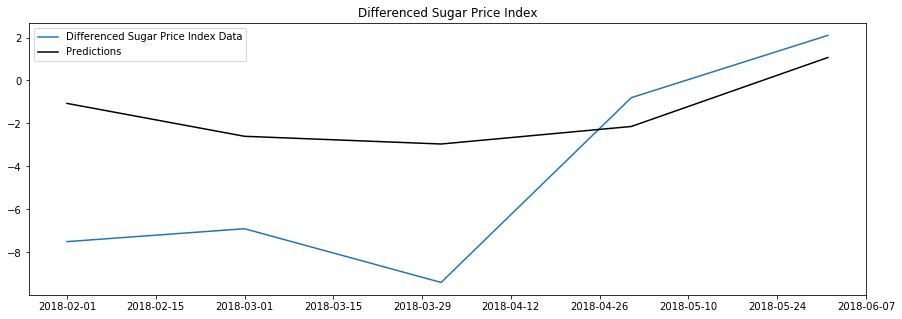

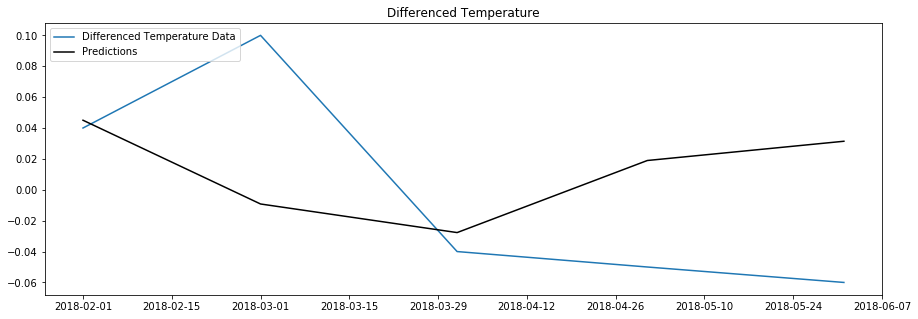

In [18]:
VAR_model(indexed_df, 1, 1, 5, 40)

In [20]:
def ARIMA_model(df, target, ar, ma, h):
    pfarima_model = pf.ARIMA(data=df, ar=ar, ma=ma, target=target, family=pf.Normal())
    #arima_x = pfarima_model.fit("MLE")
    #arima_x.summary()
    arima_x_mh = pfarima_model.fit("M-H")
    arima_x_mh.summary()
    pfarima_model.plot_z(figsize=(15,5))
    pfarima_model.plot_fit(figsize=(15,10))
    pfarima_model.plot_predict_is(h=h, figsize=(15,5))

Acceptance rate of Metropolis-Hastings is 0.1782
Acceptance rate of Metropolis-Hastings is 0.24305

Tuning complete! Now sampling.
Acceptance rate of Metropolis-Hastings is 0.2591
Normal ARIMA(1,0,6)                                                                                       
======================================================= ==================================================
Dependent Variable: Sugar Price Index                   Method: Metropolis Hastings                       
Start Date: 1990-07-01 00:00:00                         Unnormalized Log Posterior: -1356.0493            
End Date: 2018-06-01 00:00:00                           AIC: 2730.098616572367                            
Number of observations: 336                             BIC: 2764.4526170120357                           
Latent Variable                          Median             Mean               95% Credibility Interval 
======================================== ================== =============

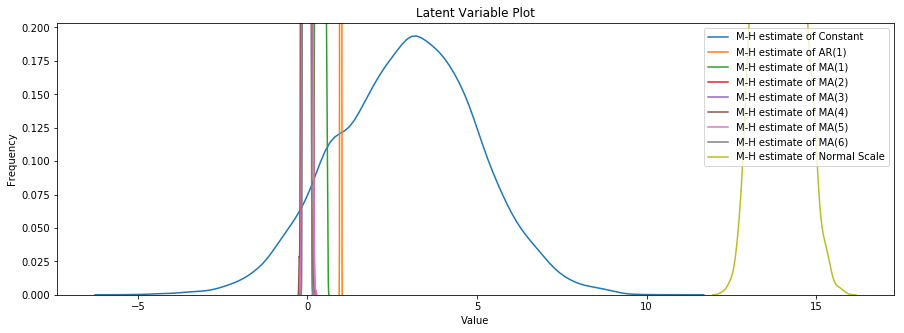

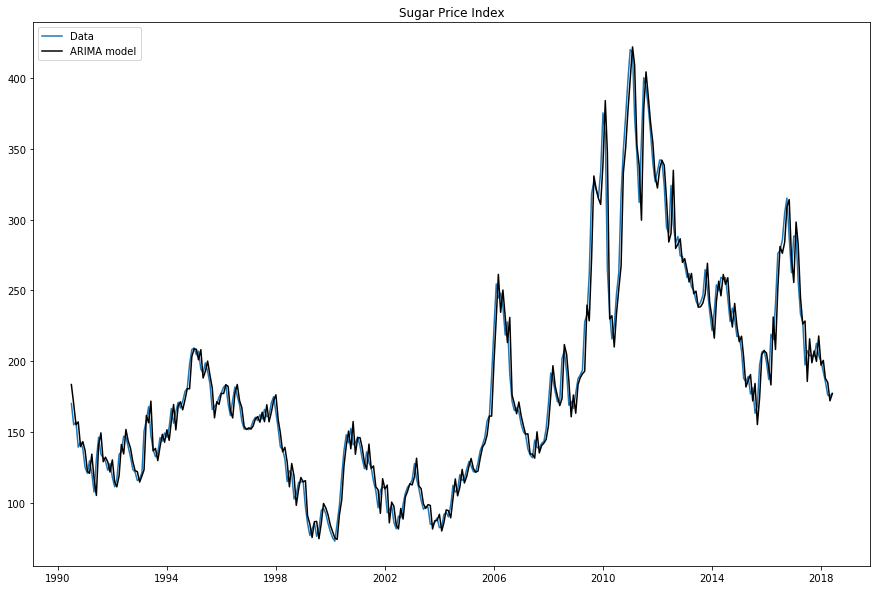

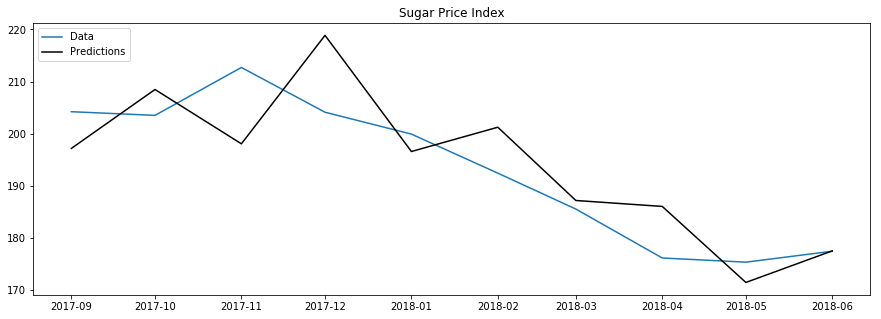

In [21]:
ARIMA_model(indexed_df, 'Sugar Price Index', 1, 6, 10)

In [ ]:
ARIMA_model(indexed_df, 'Sugar Price Index', 1, 12)

In [ ]:
ARIMA_model(indexed_df, 'Sugar Price Index', 2, 12)

# Forecasting

# Save Model